# **GROUP NUMBER: 6442**

# **MScFE 652 RISK MANAGEMENT**

**Group Work Project # 3**

# **Tasks**

# **Step 2**

Macroeconomic and Financial data that we have since the beginning, is used for allocation. In order to divide our data into three portions, i.e., training, validation and testing, we’ll amalgamate the macroeconomic and financial datasets into one dataframe and then we’ll slice the data frame accordingly to divide it into three parts. Approximately, 80% data is allocated to the training set, 10% to the validation set and the next 10% to the testing set.

In [ ]:
!pip install fredapi
!pip install hmms
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.8/524.8 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for hmms: filename=hmms-0.2.3-cp310-cp310-linux_x86_64.whl size=2158060 sha256=a1b6f7f9033de1654d2278325073835e624adef652fa2f33a8c13cb99acd6d4e
  Stored in directory: /root/.cache/pip/wheels/aa/6f/a4/1dbae244341f24881dce9465aa533729d2ae870cff3866070f
Successfully built hmms
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
from fredapi import Fred
# FRED API key
fred_key = "f9c22fca078ece81a7a2ac6fba29b8a9";
# Initiates a session with the FRED datacenter to recieve datasets
fred = Fred(api_key=fred_key);
# Retrieve data from FRED API
fred_data = pd.DataFrame(fred.get_series('WTISPLC'), columns=['WTISPLC'])

In [ ]:
datasets_fred = [
'WTISPLC',    # Spot Crude Oil Price: West Texas Intermediate (WTI) (WTISPLC)
'CPIENGSL', # Consumer Price Index for All Urban Consumers: Energy in U.S. City Average
'CAPG211S', # Industrial Capacity: Mining: Oil and Gas Extraction (NAICS = 211)
'CAPUTLG211S', #  Capacity Utilization: Mining: Oil and Gas Extraction (NAICS = 211)
'IPG211S', # Industrial Production Index: Mining: Oil and Gas Extraction (NAICS = 211)
'INDPRO', #  Industrial Production: Total Index
'IPN213111N', # Industrial Production: Mining: Drilling Oil and Gas Wells
'PCU211211', # Producer Price Index: Mining: Oil and Gas Extraction (NAICS = 211)
                ];

data_frames = []; # List of dataframes to be concatenated

# Adding FRED datasets
for series_id in datasets_fred:
  # Get series from FRED
  df = pd.DataFrame(fred.get_series(series_id), columns=[series_id]);
  data_frames.append(df);

macro_data = pd.concat(data_frames, axis=1)
#macro_data = macro_data[macro_data.index > '2000-01-01']

In [ ]:
financial_datasets_fred = [
'DEXCAUS', #Canadian dollar to US dollar exchange rate
'VIXCLS', #CBOE Volatility Index
'DCOILWTICO', #WTI Crude oil futures
'DCOILBRENTEU', #Brent crude oil futures
'SP500', #S&P500 Index
];

finan_data_frames = []; # List of dataframes to be concatenated

# Adding FRED datasets
for series_id in financial_datasets_fred:
  # Get series from FRED
  df = pd.DataFrame(fred.get_series(series_id), columns=[series_id]);
  finan_data_frames.append(df);

fin_data = pd.concat(finan_data_frames, axis=1)
#fin_data = data_merge[fin_data.index > '2000-01-01']

In [ ]:
def clean(data):
  data.replace('-', np.nan, regex=True, inplace=True);
  data.fillna(method='bfill', inplace=True);


In [ ]:
macro = clean(macro_data)
fin = clean(fin_data)

<ipython-input-8-d7f392468464>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True);


*First*, the two datasets are being merged to form a dataframe and then two additional columns are added, one for the current crude oil price and next for the predicted or forecasted prices.


In [ ]:
data_merge=[]

In [ ]:
data_merge.append(macro)
data_merge.append(fin)

In [ ]:
#adding two additional columns for current and forecast price

datasets = datasets_fred + financial_datasets_fred + ['WTISPLC', 'forecast'];
current = pd.DataFrame(fred.get_series('WTISPLC'), columns=['WTISPLC']);
forecast = pd.DataFrame(fred.get_series('WTISPLC').shift(-1), columns=['forecast']);
data_merge.append(current);
data_merge.append(forecast);

In [ ]:
#amalgamate all datasets in single dataframe

data = pd.concat(data_merge, axis=1, join='inner')

After that, the data is sliced into training, validation and testing data and the results are observed as follows-


In [ ]:
#slicing into training, validation, testing datasat

train_data = data[: int(data.shape[0] * 0.80)];
vald_data = data[int(0.80 * data.shape[0]) : int(0.90 * data.shape[0])];
test_data = data[int(0.90* data.shape[0]) : int(data.shape[0])];
print(train_data)
print(vald_data)
print(test_data)

            WTISPLC  forecast
1946-01-01     1.17      1.17
1946-02-01     1.17      1.17
1946-03-01     1.17      1.27
1946-04-01     1.27      1.27
1946-05-01     1.27      1.27
...             ...       ...
2008-06-01   133.93    133.44
2008-07-01   133.44    116.61
2008-08-01   116.61    103.90
2008-09-01   103.90     76.65
2008-10-01    76.65     57.44

[754 rows x 2 columns]
            WTISPLC  forecast
2008-11-01    57.44     41.02
2008-12-01    41.02     41.74
2009-01-01    41.74     39.16
2009-02-01    39.16     47.98
2009-03-01    47.98     49.79
...             ...       ...
2016-04-01    40.75     46.71
2016-05-01    46.71     48.76
2016-06-01    48.76     44.65
2016-07-01    44.65     44.72
2016-08-01    44.72     45.18

[94 rows x 2 columns]
            WTISPLC  forecast
2016-09-01    45.18     49.78
2016-10-01    49.78     45.66
2016-11-01    45.66     51.97
2016-12-01    51.97     52.50
2017-01-01    52.50     53.47
...             ...       ...
2024-03-01    81.28    

The allocation of the data to training, validation, and testing dataset is done as above.

# **Step 3 & Step 4**

In order to validate the model, hill climbing is used to run the Bayesian Network model on the discretized data. The data is discretized into binary values. At first the parameters of the hidden markov model are computed and then with an initial expert knowledge model, hill climbing is performed.


In [ ]:
 #learning the parameters of hmm

import hmmlearn.hmm as hmms
import pandas as pd

for series_id in train_data.columns: # Iterate over existing columns in train_data
  if series_id == 'forecast':
    continue  # Skip the 'forecast' column

  dhmm = hmms.GaussianHMM(n_components=3, covariance_type="diag")
  data_diff = train_data[series_id].diff()[1:]
  split_index = (len(data_diff) // 32) * 32
  emit_seq = data_diff.values.reshape(-1, 1)[:split_index]
  dhmm.fit(emit_seq)
  path = "./hmms/" + series_id.replace(".", "_")

In [ ]:
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM

# Construction of discretized training dataframe
disc_test = pd.DataFrame(index=train_data[1:].index)

for series_id in datasets:
    if series_id == 'forecast':
        # Handle the forecast case as needed (if not fitting, skip to the next series)
        continue
    elif series_id in train_data.columns:
      dhmm = GaussianHMM(n_components=3, covariance_type="diag")
      data_diff = train_data[series_id].diff()[1:]
      emit_seq = np.array(data_diff.apply(lambda x: 1 if x > 0 else 0).values)

      # Reshaping emit_seq for fitting
      emit_seq = emit_seq.reshape(-1, 1)

      # Fitting the HMM model
      try:
          dhmm.fit(emit_seq)
      except ConvergenceWarning:
          # Handle convergence warning by reducing the number of clusters
          dhmm = GaussianHMM(n_components=2, covariance_type="diag")
          dhmm.fit(emit_seq)

      # Using decode instead of viterbi
      log_prob, s_seq = dhmm.decode(emit_seq)

      disc_test[series_id] = s_seq
    else:
      pass




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Re-running the Bayesian network using hill climbing

In [ ]:
!pip install pgmpy

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import BicScore, K2Score
from pgmpy.estimators import HillClimbSearch, BayesianEstimator, K2Score
import networkx as nx
import matplotlib.pyplot as plt

# Load the discretized training data
d_f = pd.merge(macro_data, fin_data, left_index=True, right_index=True)
d_f.dropna(inplace=True)

# Discretize the data for HMM
combined_data_diff = d_f.diff().dropna()
discretized_data = combined_data_diff.applymap(lambda x: 1 if x > 0 else 0)
train_data = discretized_data

# Hill Climbing Search Implementation
hc = HillClimbSearch(train_data)

# Expert knowledge model initialization
expert = BayesianNetwork()
expert.add_nodes_from(datasets_fred + financial_datasets_fred)
expert.add_edges_from([
   ('WTISPLC' , 'DEXCAUS'),        # Exchange rate influences crude oil prices
    ('VIXCLS', 'WTISPLC'),         # Market volatility influences crude oil prices
    ('WTISPLC' , 'DCOILWTICO'),     # Futures prices influence spot prices
    ('SP500', 'WTISPLC'),          # Stock market influences crude oil prices

    ('WTISPLC', 'CPIENGSL'),       # Crude oil prices influence energy costs
    ('DCOILBRENTEU', 'CPIENGSL'),  # Brent futures influence energy costs

    ('WTISPLC', 'CAPG211S'),       # Oil prices influence capacity in extraction
    ('INDPRO', 'CAPG211S'),        # Industrial production impacts capacity in extraction

    ('CAPG211S', 'CAPUTLG211S'),   # Capacity drives utilization in extraction
    ('IPN213111N', 'CAPUTLG211S'), # Drilling activity influences capacity utilization

    ('CAPUTLG211S', 'IPG211S'),    # Capacity utilization increases production
    ('WTISPLC', 'IPG211S'),        # Oil prices influence production levels

    ('DEXCAUS', 'INDPRO'),         # Exchange rates affect industrial production

    ('WTISPLC', 'IPN213111N'),     # Oil prices influence drilling activity
    ('CAPG211S', 'IPN213111N'),    # Capacity impacts drilling activity

    ('WTISPLC', 'PCU211211'),      # Oil prices affect producer price index
    ('CAPUTLG211S', 'PCU211211'),  # Capacity utilization impacts producer prices

    ('WTISPLC', 'DEXCAUS'),        # Crude oil prices impact exchange rates

    ('SP500', 'VIXCLS'),           # Stock market performance influences market volatility

    ('WTISPLC', 'DCOILWTICO'),     # Spot prices impact futures prices
    ('DEXCAUS', 'DCOILWTICO'),     # Exchange rates influence futures prices

    ('WTISPLC', 'DCOILBRENTEU'),   # WTI prices impact Brent futures
    ('DEXCAUS', 'DCOILBRENTEU'),   # Exchange rates influence Brent futures

    ('SP500' , 'INDPRO'),           # Industrial production influences stock market performance
    ('SP500' , 'WTISPLC'),          # Crude oil prices can impact the stock market
])

# Perform Hill Climbing search and create a BayesianModel from the estimated DAG
model_structure = hc.estimate(scoring_method=K2Score(train_data)) # Estimate the DAG structure
model = BayesianNetwork(model_structure.edges()) # Create a BayesianModel from the DAG

# Fit the model to training data
model.fit(train_data, state_names=dict(map(lambda e: (e, [0, 1, 2]), datasets_fred + financial_datasets_fred)), estimator=BayesianEstimator, prior_type="K2")





<ipython-input-164-a33062c1f847>:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  discretized_data = combined_data_diff.applymap(lambda x: 1 if x > 0 else 0)


  0%|          | 0/1000000 [00:00<?, ?it/s]

Finally, the Bayesian network model is fitted and the visualization of the resulting network is observed as follows-

Graph edges: [('WTISPLC', 'PCU211211'), ('WTISPLC', 'DCOILBRENTEU'), ('WTISPLC', 'DCOILWTICO'), ('PCU211211', 'SP500'), ('PCU211211', 'CPIENGSL'), ('PCU211211', 'VIXCLS'), ('PCU211211', 'DCOILBRENTEU'), ('PCU211211', 'DCOILWTICO'), ('SP500', 'CAPG211S'), ('CPIENGSL', 'VIXCLS'), ('CPIENGSL', 'DCOILBRENTEU'), ('CPIENGSL', 'DCOILWTICO'), ('CAPG211S', 'IPG211S'), ('IPG211S', 'CAPUTLG211S'), ('CAPUTLG211S', 'INDPRO'), ('CAPUTLG211S', 'DCOILWTICO'), ('INDPRO', 'IPN213111N'), ('IPN213111N', 'DEXCAUS'), ('IPN213111N', 'VIXCLS'), ('DEXCAUS', 'VIXCLS'), ('DEXCAUS', 'DCOILBRENTEU'), ('VIXCLS', 'DCOILBRENTEU'), ('DCOILBRENTEU', 'DCOILWTICO')]


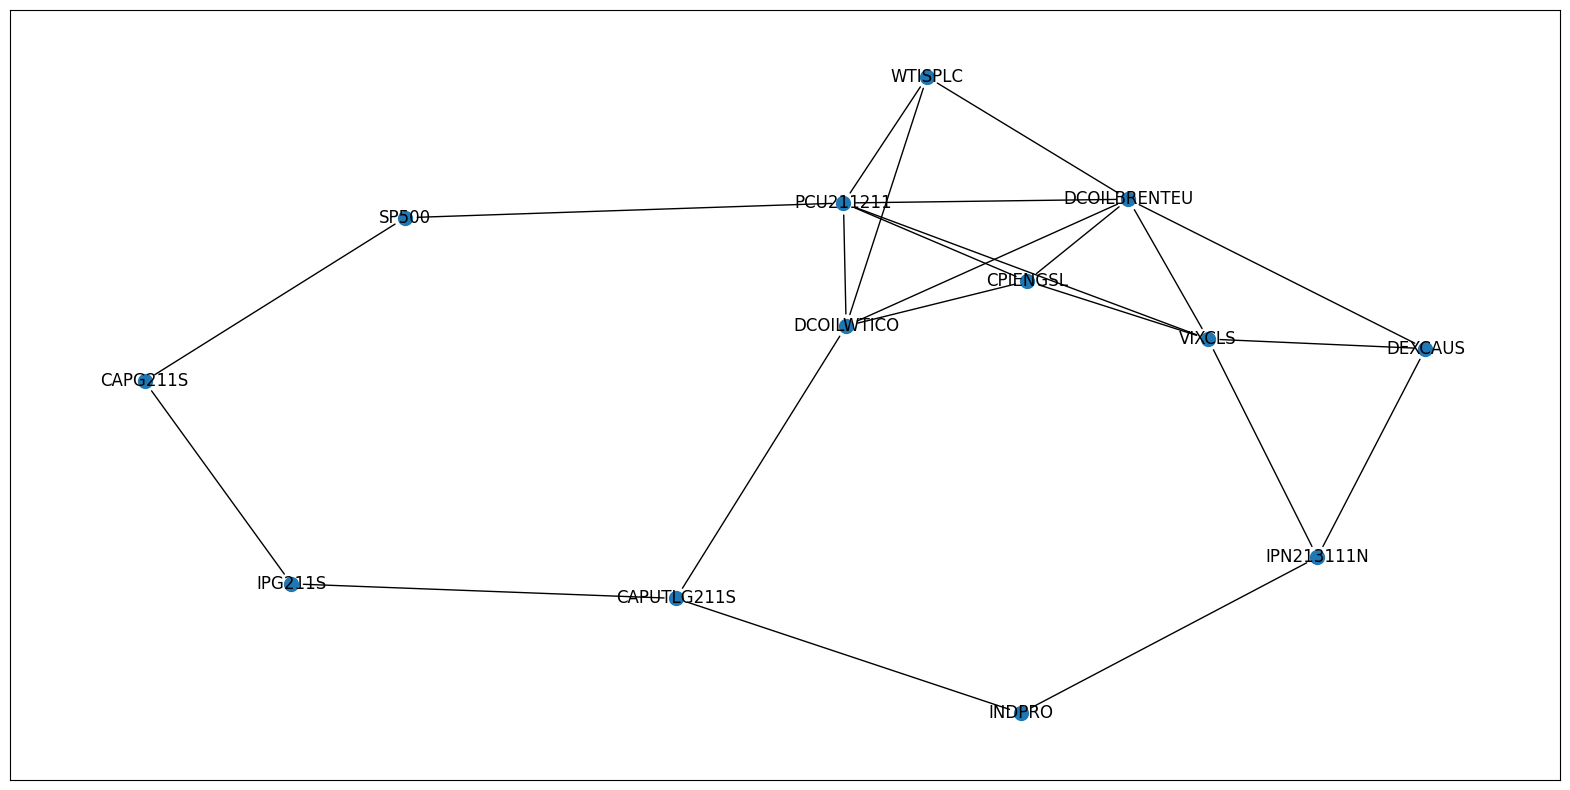

In [ ]:
G = nx.Graph()
G.add_edges_from(model.edges())
print("Graph edges:", G.edges())

pos = nx.spring_layout(G)
plt.figure(figsize=(20, 10))
nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_edges(G, pos, arrows=True)
nx.draw_networkx_labels(G, pos)
plt.show()

# **Step 5**

In order to report the accuracy of the forecasted crude oil prices after successfully fitting the model to the data, first the testing will be done on validation dataset to know if any adjustments are required. After that, the testing will be done on the testing dataset to report the accuracy of the model.

Testing on validation data

In [ ]:
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM

# Initialize an empty DataFrame to store the discretized validation data
discrete_vald = pd.DataFrame(index=vald_data[1:].index)

# Process each column in the vald_data (here WTISPLC and forecast)
for series_id in vald_data.columns:
    print(f"Processing {series_id}...")

    # Initialize the HMM model (GaussianHMM)
    dhmm = GaussianHMM(n_components=3, covariance_type="diag")

    # Calculate the difference in validation data and discretize
    vald_data_diff = vald_data[series_id].diff()[1:]
    emit_seq_vald = np.array(vald_data_diff.apply(lambda x: 1 if x > 0 else 0).values)

    try:
        # Fit the HMM to the validation emission sequence
        dhmm.fit(emit_seq_vald.reshape(-1, 1))

        # Decode the validation sequence
        log_prob, s_seq = dhmm.decode(emit_seq_vald.reshape(-1, 1))

        # Store the discretized sequence
        discrete_vald[series_id] = s_seq

        print(f"Finished processing {series_id}.")

    except ValueError as e:
        print(f"Error processing {series_id}: {e}")


Processing WTISPLC...
Finished processing WTISPLC.
Processing forecast...
Finished processing forecast.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# Record real data observation, to be compared with the predicted one
vald_real = discrete_vald['WTISPLC'].values;
pred_value_vald = discrete_vald['forecast'].values;

In [ ]:
print("\nPredicted Value: ");
print(pred_value_vald);
print("\nReal Value: ");
print(vald_real);
error = np.mean(vald_real != np.roll(pred_value_vald, 1));
#error = np.mean(vald_real != pred_value_vald);
print("\nError: ");
print(error * 100);


Predicted Value: 
[2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 2 0 2 2 2 0 2 2 2 2 2 2 2 0 0 2 0 0 2 2 2 2
 2 2 0 0 0 2 2 2 0 0 2 2 2 0 0 2 2 2 2 0 0 0 2 0 2 0 2 2 2 0 0 0 0 0 0 0 2
 0 2 2 2 0 0 2 2 0 0 0 0 2 2 2 2 0 2 2]

Real Value: 
[0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1]

Error: 
59.13978494623656


Testing on test data

In [ ]:
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM

# Initialize an empty DataFrame to store the discretized validation data
discrete_test = pd.DataFrame(index=test_data[1:].index)

# Process each column in the vald_data (here WTISPLC and forecast)
for series_id in test_data.columns:
    print(f"Processing {series_id}...")

    # Initialize the HMM model (GaussianHMM)
    dhmm = GaussianHMM(n_components=3, covariance_type="diag")

    # Calculate the difference in validation data and discretize
    test_data_diff = test_data[series_id].diff()[1:]
    emit_seq_vald = np.array(test_data_diff.apply(lambda x: 1 if x > 0 else 0).values)

    try:
        # Fit the HMM to the validation emission sequence
        dhmm.fit(emit_seq_vald.reshape(-1, 1))

        # Decode the validation sequence
        log_prob, s_seq = dhmm.decode(emit_seq_vald.reshape(-1, 1))

        # Store the discretized sequence
        discrete_test[series_id] = s_seq

        print(f"Finished processing {series_id}.")

    except ValueError as e:
        print(f"Error processing {series_id}: {e}")

Processing WTISPLC...
Finished processing WTISPLC.
Processing forecast...
Finished processing forecast.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# Record real data observation, to be compared with the predicted one
test_real = discrete_test['WTISPLC'].values;
pred_value_test = discrete_test['forecast'].values;

In [ ]:
print("\nPredicted Value: ");
print(pred_value_test);
print("\nReal Value: ");
print(test_real);
error = np.mean(test_real != np.roll(pred_value_test, 1));
#error = np.mean(vald_real != pred_value_vald);
print("\nError: ");
print(error * 100);


Predicted Value: 
[2 1 1 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 2 2 1 1 1 1 2 2 1 2 1 2 1
 1 2 2 2 2 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 1 1 2 2 1 1 1 2 1 1 2 2 2 1 2 2
 1 2 2 1 2 2 1 1 1 2 2 2 1 1 1 1 2 2 1 2]

Real Value: 
[2 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0
 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0
 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1]

Error: 
40.42553191489361


In order to display the results graphically, the following plot is observed

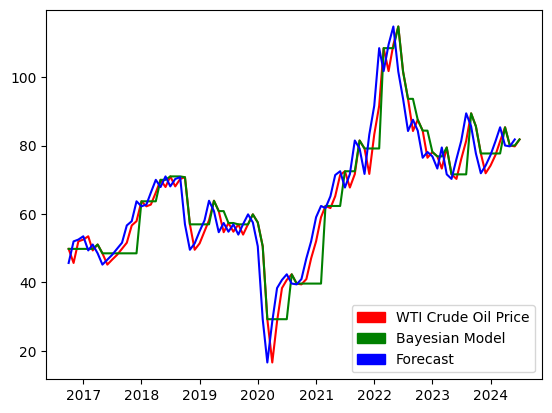

In [ ]:
import matplotlib.patches as mpatches # Import the patches module from matplotlib
import matplotlib.pyplot as plt
# Record real data observation, to be compared with the predicted one
test_real = discrete_test['WTISPLC'].values;

# Adjust index to match the length of pred_value_test
pred_value_test = discrete_test['forecast'].values;
test_signal = pd.DataFrame(pred_value_test, columns=['forecast'], index=test_price.index[1:]); # Use index starting from the second element

test_sheet = pd.concat([test_price, test_signal], axis=1, join='inner');
trades = [test_sheet['WTISPLC'].iloc[0]]  # Initialize with the first price
position = False; # True for Long, False for Short
for i in range(len(test_sheet)-1):
    if test_sheet['forecast'].iloc[i+1] == 0:
        trades.append(trades[-1])  # Hold position
    elif test_sheet['forecast'].iloc[i+1] == 2:
        if position == False:
            position = True
            trades.append(trades[-1]) # Enter long position
        else:
            trades.append(test_sheet['WTISPLC'].iloc[i+1]) # Exit long position
    else:
        if position == False:
            trades.append(trades[-1]) # Hold short position
        else:
            trades.append(test_sheet['WTISPLC'].iloc[i+1]) # Continue long position

# Select rows from 'data' that match the index of 'test_signal'
eia_forecast = data.loc[test_signal.index]

# Create the DataFrame (no need to remove None values anymore)
test_performance = pd.DataFrame(trades, index = test_signal.index, columns=['performance']);
test_sheet = pd.concat([test_sheet, test_performance], axis=1, join='inner');
plt.plot(test_sheet['WTISPLC'], 'r');
plt.plot(test_sheet['performance'], 'g');
plt.plot(eia_forecast['forecast'], 'b');
r_patch = mpatches.Patch(color='red', label='WTI Crude Oil Price');
g_patch = mpatches.Patch(color='green', label='Bayesian Model');
b_patch = mpatches.Patch(color='blue', label='Forecast');
plt.legend(handles=[r_patch, g_patch, b_patch], loc = 'lower right');

From the above plot, a comparison can be made between the performance of the model and the performance of the forecasts.